In [1]:
import numpy as np
import pandas as pd
import sklearn.linear_model as skl_lm
import matplotlib.pyplot as plt

# 2.1 Problem 1.1 using matrix multiplications
Implement the linear regression problems from Exercises 1.1(a), (b), (c), (d) and (e) in Python using matrix multiplications.
A matrix $$\textbf{X} =  \begin{bmatrix}
1 & 2 \\
1 & 3 \\ 
\end{bmatrix}
$$
can be constructed with numpy as `X=np.array([[1, 2], [1, 3]])` (Make sure that `numpy` has been imported. Here it is imported as `np`). The commands for matrix multiplication and transpose in `numpy` are `@` or `np.matmul` and `.T` or `np.transpose()` respectively. A system of linear equations $\textbf{A}x=\textbf{b}$ can be solved using `np.linalg.solve(A,b)`.  A $k \times k$ unit matrix can be constructed with `np.eye(k)`.


## (a)

In [2]:
X = np.array([[1,2],[1,3]])
Y = np.array([[-1],[1]])
beta = np.linalg.solve(X.T@X,X.T@Y)
pred = beta.T@np.array([[1,3]]).T
pred

array([[1.]])

## (b)

In [3]:
X = np.array([[1,2],[1,3],[1,4]])
Y = np.array([[-1],[1],[2]])
beta = np.linalg.solve(X.T@X,X.T@Y)
pred = beta.T@np.array([[1,5]]).T
pred

array([[3.66666667]])

## (c)

In [4]:
X = np.array([[2],[3],[4]])
Y = np.array([[-1],[1],[2]])
beta = np.linalg.solve(X.T@X,X.T@Y)
pred = beta@np.array([[5]]).T
pred

array([[1.55172414]])

## (d)

In [5]:
X = np.array([[1,2],[1,3],[1,4]])
Y = np.array([[-1],[1],[2]])
I = np.eye(2)
beta = np.linalg.solve((X.T@X+I),X.T@Y)
pred = beta.T@np.array([[1,5]]).T
pred

array([[1.76923077]])

## (e)

In [6]:
X = np.array([[1,2],[1,3],[1,4]])
Y = np.array([[-1,0],[1,2],[2,-1]])
beta = np.linalg.solve(X.T@X,X.T@Y)
pred = beta[0].T@np.array([[1,5]]).T
beta

array([[-3.83333333,  1.83333333],
       [ 1.5       , -0.5       ]])

# 2.2 Problem 1.1 using the linear_model.LinearRegression() command
Implement the linear regression problem from Exercises 1.1(b) and (c) using the command `LinearRegression()` from `sklearn.linear_model`. 

## (b)

The coeficient for X is :  [[1.5]]
The offset is:  [-3.83333333]


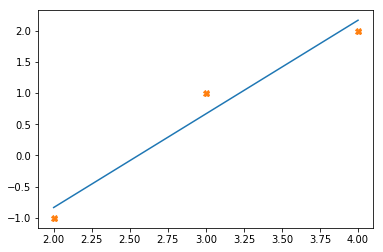

In [7]:
X = np.array([[2],[3],[4]])
Y = np.array([[-1],[1],[2]])
lr = skl_lm.LinearRegression()
lr.fit(X,Y)
hat = lr.predict(X)
plt.plot(X,hat)
plt.plot(X,Y,'X')
print('The coeficient for X is : ', lr.coef_)
print('The offset is: ', lr.intercept_)

C

The coeficient for X is :  [[0.31034483]]
The offset is:  0.0


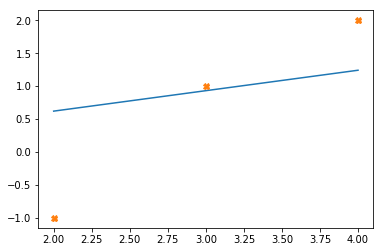

In [8]:
X = np.array([[2],[3],[4]]).reshape(-1,1)
Y = np.array([[-1],[1],[2]])
lr = skl_lm.LinearRegression(fit_intercept=False)
lr.fit(X, Y)
hat = lr.predict(X)
plt.plot(X,hat)
plt.plot(X,Y,'X')
print('The coeficient for X is : ', lr.coef_)
print('The offset is: ', lr.intercept_)

# 2.3 The Auto data set

## (a)
Load the dataset `'Data/Auto.csv'`. Familiarize yourself with the dataset using `Auto.info()`. The dataset:  

**Description**:  Gas mileage, horsepower, and other information for 392 vehicles.  
**Format**: A data frame with 392 observations on the following 9 variables.  

- `mpg`: miles per gallon  
- `cylinders`: Number of cylinders between 4 and 8
- `displacement`: Engine displacement (cu. inches)
- `horsepower`: Engine horsepower
- `weight`: Vehicle weight (lbs.)
- `acceleration`: Time to accelerate from 0 to 60 mph (sec.)
- `year`: Model year (modulo 100)
- `origin`: Origin of car (1. American, 2. European, 3. Japanese)
- `name`: Vehicle name  
*The orginal data contained 408 observations but 16 observations with missing values were removed.*


In [9]:
# Set seed to get reproducible results
np.random.seed(1)

# a) load library and familiarize with the data
# The null values are '?' in the dataset. `na_values="?"` recognize the null values. 
# There are null values that will mess up the computation. Easier to drop them by `dropna()`.
Auto = pd.read_csv('Data/Auto.csv', na_values='?').dropna()

# TODO: Familarize yourself with the dataset

## (b)
Divide the data set randomly into two approximately equally sized subsets, `train` and `test` by generating the random indices using `np.random.choice()`.


In [10]:
trainI = np.random.choice(Auto.shape[0],size=200, replace=False)
trainIndex = Auto.index.isin(trainI)

In [11]:
train = Auto.iloc[trainIndex]
test = Auto.iloc[~trainIndex]
test

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
7,14.0,8,440.0,215.0,4312,8.5,70,1,plymouth fury iii
10,15.0,8,383.0,170.0,3563,10.0,70,1,dodge challenger se
15,22.0,6,198.0,95.0,2833,15.5,70,1,plymouth duster
20,25.0,4,110.0,87.0,2672,17.5,70,2,peugeot 504
21,24.0,4,107.0,90.0,2430,14.5,70,2,audi 100 ls
22,25.0,4,104.0,95.0,2375,17.5,70,2,saab 99e
24,21.0,6,199.0,90.0,2648,15.0,70,1,amc gremlin


## (c)
Perform linear regression with `mpg` as the output and all other variables except name as input. How well (in terms of root-mean-square-error) does the model perform on test data and training data, respectively?


In [12]:
def MSE(yhat,y):
    mse = np.mean((yhat-y)**2)
    return mse

In [13]:
model = skl_lm.LinearRegression()
X_train = train[['cylinders', 'displacement', 'horsepower', 'weight',\
'acceleration', 'year', 'origin']]
Y_train = train['mpg']
X_test = test[['cylinders', 'displacement', 'horsepower', 'weight',\
'acceleration', 'year', 'origin']]
Y_test = test['mpg']

model.fit(X_train, Y_train)
train_hat = model.predict(X_train)
test_hat = model.predict(X_test)
RMSE_train = np.sqrt(np.mean((train_hat - train.mpg)**2))
RMSE_test = np.sqrt(np.mean((test_hat - test.mpg)**2))

print('Train RMSE: %2.6f' % RMSE_train)
print('Test RMSE: %2.6f' % RMSE_test)

Train RMSE: 3.282090
Test RMSE: 3.336977


## (d)
Now, consider the input variable `origin`. What do the different numbers represent? By running `Auto.origin.sample(30)` we see the 30 samples of the variable and that the input variables is quantitative. Does it really makes sense to treat it as a quantitative input? Use `np.get_dummies()` to split it into dummy variables and do the linear regression again.


In [14]:
model = skl_lm.LinearRegression()
dumTrain = pd.get_dummies(train, columns=['origin'])
dumTest = pd.get_dummies(test, columns=['origin'])


X_train = dumTrain[['cylinders', 'displacement', 'horsepower', 'weight',\
'acceleration', 'year','origin_1','origin_2','origin_3']]
Y_train = dumTrain['mpg']
X_test = dumTest[['cylinders', 'displacement', 'horsepower', 'weight',\
'acceleration', 'year','origin_1','origin_2','origin_3']]
Y_test = dumTest['mpg']

model.fit(X_train, Y_train)
train_hat = model.predict(X_train)
test_hat = model.predict(X_test)
RMSE_train = np.sqrt(np.mean((train_hat - train.mpg)**2))
RMSE_test = np.sqrt(np.mean((test_hat - test.mpg)**2))

print('Train RMSE: %2.6f' % RMSE_train)
print('Test RMSE: %2.6f' % RMSE_test)


Train RMSE: 3.262970
Test RMSE: 3.310753


## (e)
Try obtain a better RMSE on test data by removing some inputs (explore what happens if you remove, e.g, `year`, `weight` and `acceleration`)

In [15]:
model = skl_lm.LinearRegression()
dumTrain = pd.get_dummies(train, columns=['origin'])
dumTest = pd.get_dummies(test, columns=['origin'])


X_train = dumTrain[['cylinders', 'displacement', 'horsepower', 'weight',\
'acceleration', 'year']]
Y_train = dumTrain['mpg']
X_test = dumTest[['cylinders', 'displacement', 'horsepower', 'weight',\
'acceleration', 'year']]
Y_test = dumTest['mpg']

model.fit(X_train, Y_train)
train_hat = model.predict(X_train)
test_hat = model.predict(X_test)
RMSE_train = np.sqrt(np.mean((train_hat - train.mpg)**2))
RMSE_test = np.sqrt(np.mean((test_hat - test.mpg)**2))

print('Train RMSE: %2.6f' % RMSE_train)
print('Test RMSE: %2.6f' % RMSE_test)


Train RMSE: 3.433501
Test RMSE: 3.390805


## (f)
Try to obtain a better RMSE on test data by adding some transformations of inputs, such as 
$log(x)$, $\sqrt{x}$, $x_1x_2$ etc.


In [16]:
model = skl_lm.LinearRegression()
dumTrain = pd.get_dummies(train, columns=['origin'])
dumTest = pd.get_dummies(test, columns=['origin'])


X_train = dumTrain[['cylinders', 'displacement', 'horsepower', 'weight',\
'acceleration', 'year','origin_1','origin_2','origin_3']]
Y_train = dumTrain['mpg']
X_test = dumTest[['cylinders', 'displacement', 'horsepower', 'weight',\
'acceleration', 'year','origin_1','origin_2','origin_3']]
Y_test = dumTest['mpg']

model.fit(X_train, Y_train)
train_hat = model.predict(X_train)
test_hat = model.predict(X_test)
RMSE_train = np.sqrt(np.mean((train_hat - train.mpg)**2))
RMSE_test = np.sqrt(np.mean((test_hat - test.mpg)**2))

print('Train RMSE: %2.6f' % RMSE_train)
print('Test RMSE: %2.6f' % RMSE_test)


Train RMSE: 3.262970
Test RMSE: 3.310753


# 2.4 Nonlinear transformations of input variables

Start by running the following code to generate your training data
```python
np.random.seed(1)
x_train = np.random.uniform(0, 10, 100)
y_train = .4 - .6 * x_train + 3. * np.sin(x_train - 1.2) + np.random.normal(0, 0.1, 100)
```


In [17]:
np.random.seed(1)
x_train = np.random.uniform(0, 10, 100)
y_train = .4 - .6 * x_train + 3. * np.sin(x_train - 1.2) + np.random.normal(0, 0.1, 100)

## (a) 
Plot the training output y_train versus the training input x_train.  

Text(0, 0.5, 'Output')

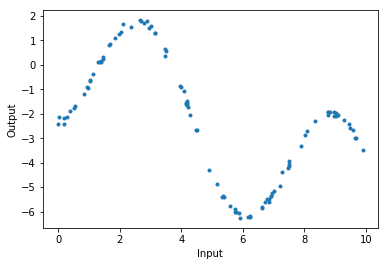

In [18]:
plt.plot(x_train,y_train,'.')
plt.xlabel('Input')
plt.ylabel('Output')

## (b) 
Learn a model on the form 
$$y= a + bx + c sin(x + \phi) + \epsilon,  \qquad  \epsilon \sim \mathcal{N}(0, 0,1^2) \qquad (2.1)$$

where all parameters $a$, $b$, $c$ and $\phi$ are to be learned from the training data `x_train` and `y_train`. Refrain from using the` linear_model()` command, but implement the normal equations yourself as in problem 2.1. Hint: Even though (2.1) is not a linear regression model, you can use the fact that $c sin(x + \phi) = c cos(\phi) sin(x) + c sin(\phi) cos(x)$ to transform it into one.  


[[ 0.42117995]
 [-0.60266039]
 [ 1.08808499]
 [-2.78869453]]


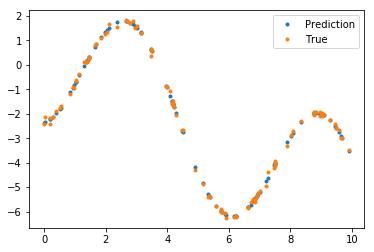

In [64]:
A = np.column_stack([np.ones(len(x_train)),x_train,\
     np.sin(x_train),np.cos(x_train)])
y_train = np.array(y_train).reshape(-1,1)

beta = np.linalg.solve(A.T@A,A.T@y_train)
y_hat = A@beta
plt.plot(x_train, y_hat,'.',label='Prediction')
plt.plot(x_train, y_train, '.',label='True')
plt.legend()
print(beta)

## (c) 
Construct 100 test inputs `x_test` in the span from 0 to 10 by using the `np.linspace()` function. Predict the outputs corresponding to these inputs and plot them together with the training data.

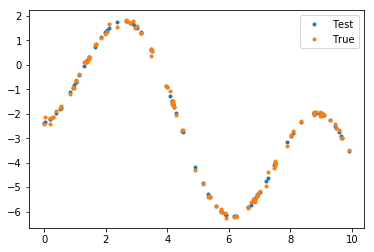

In [65]:
np.random.seed(1)
x_test = np.random.uniform(0,10,100)
A_test = np.column_stack([np.repeat(1,100),x_test,\
                     np.sin(x_test),np.cos(x_test)])

y_hat = A_test@beta
plt.plot(x_test, y_hat,'.',label='Test')

plt.plot(x_train, y_train, '.',label='True')
plt.legend()
plt.show()

## (d) 
Do a least squares fit by instead using the `linear_model()` function in `Python`. Check that you get the same estimates as in (b).

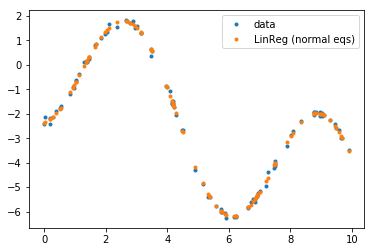

[[ 1.00000000e+00  4.17022005e+00 -8.56591538e-01 -5.15995094e-01]
 [ 1.00000000e+00  7.20324493e+00  7.95637742e-01  6.05772716e-01]
 [ 1.00000000e+00  1.14374817e-03  1.14374792e-03  9.99999346e-01]
 [ 1.00000000e+00  3.02332573e+00  1.17991419e-01 -9.93014615e-01]
 [ 1.00000000e+00  1.46755891e+00  9.94675749e-01  1.03054133e-01]
 [ 1.00000000e+00  9.23385948e-01  7.97648331e-01  6.03122824e-01]
 [ 1.00000000e+00  1.86260211e+00  9.57725945e-01 -2.87682142e-01]
 [ 1.00000000e+00  3.45560727e+00 -3.08879422e-01 -9.51101205e-01]
 [ 1.00000000e+00  3.96767474e+00 -7.35281611e-01 -6.77761723e-01]
 [ 1.00000000e+00  5.38816734e+00 -7.80220320e-01  6.25504798e-01]
 [ 1.00000000e+00  4.19194514e+00 -8.67598561e-01 -4.97265259e-01]
 [ 1.00000000e+00  6.85219500e+00  5.38798047e-01  8.42434962e-01]
 [ 1.00000000e+00  2.04452250e+00  8.89874571e-01 -4.56205269e-01]
 [ 1.00000000e+00  8.78117436e+00  6.00081987e-01 -7.99938503e-01]
 [ 1.00000000e+00  2.73875932e-01  2.70464934e-01  9.62729827e

In [68]:
model = skl_lm.LinearRegression()
model.fit(A_test,y_train)
pred = model.predict(A_test)

plt.plot(x_train, y_train, '.', label='data')
plt.plot(x_test, y_hat, '.', label='LinReg (normal eqs)')
plt.plot(x_test, pred, '.', label='LinReg (built-in-func)')
plt.legend()
plt.show()
print(A_test)

# 2.5  Regularization

In this exercise we will apply Ridge regression and Lasso for fitting a polynomial to a scalar data set. We will have a setting where we first generate synthetic training data from 

$$y = x^3 + 2x^2 + 6 + \epsilon, \qquad (2.2)$$ and later try to learn model for the data.   

## (a) 
Write a function that implements the polynomial (2.2), i.e., takes $x$ as argument and returns $x^3 + 2x^2 + 6$. 

In [72]:
def f(x):
    return x**3 + 2*x**2 +6


In [73]:
f(2)

22

## (b) 
Use `np.random.seed()` to set the random seed. Use the function `np.linspace()` to construct a vector `x` with `n = 12` elements equally spaced from $-2.3$ to $1$. Then use your function from (a) to construct a vector $\textbf{y} = [y_1, ..., y_n]^T$ with 12 elements, where $y = x^3 + 2x^2 + 6 + \epsilon$, with $\epsilon \sim  \mathcal{N(0, 1^2)}$. This is our training data.

In [88]:
np.random.seed(0)
x_train = np.linspace(-2.3, 1, 12)
y_train = f(x) + np.random.normal(0,1,12)

## (c) 
Plot the training data $\mathcal{T} = \{x_i, y_i\}_{i=1}^{12}$ together with the "true" function.

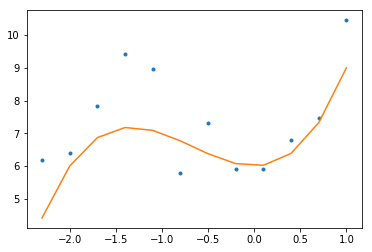

In [89]:
x_test = np.linspace(-2.3, 1, 12)
y_test = f(x_test)

plt.plot(x_train, y_train, '.')
plt.plot(x_test, y_test)
plt.show()

## (d)
Fit a straight line to the data with $y$ as output and $x$ as input and plot the predicted output $\hat{y}_{\star}$ for densely spaced $x_{\star}$ values between $-2.3$ and $1$. Plot these predictions in the same plot window.

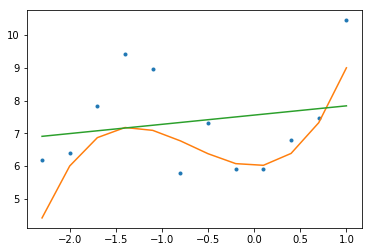

In [94]:
model = skl_lm.LinearRegression()
model.fit(x_train.reshape(-1,1), y_train)
prediction = model.predict(x_test.reshape(-1,1))

plt.plot(x_train, y_train, '.', label='data')
plt.plot(x_test, y_test, label='true')
plt.plot(x_test, prediction, label='lin reg')

## (e) 
Fit a 11th degree polynomial to the data with linear regression. Plot the corresponding predictions.

In [100]:
x_train_ext = x_train.reshape(-1,1)
x_test_ext = x_test.reshape(-1,1)

for i in range(10):
    x_train_ext = np.column_stack([x_train_ext, \
                                  x_train.reshape(-1,1)**(i+2)])
    x_test_ext = np.column_stack([x_test_ext,\
                                 x_test.reshape(-1,1)**(i+2)])
print(x_train_ext[0,:])
print(x_test_ext[0,:])

[-2.30000000e+00  5.29000000e+00 -1.21670000e+01  2.79841000e+01
 -6.43634300e+01  1.48035889e+02 -3.40482545e+02  7.83109853e+02
 -1.80115266e+03  4.14265112e+03 -9.52809758e+03]
[-2.30000000e+00  5.29000000e+00 -1.21670000e+01  2.79841000e+01
 -6.43634300e+01  1.48035889e+02 -3.40482545e+02  7.83109853e+02
 -1.80115266e+03  4.14265112e+03 -9.52809758e+03]


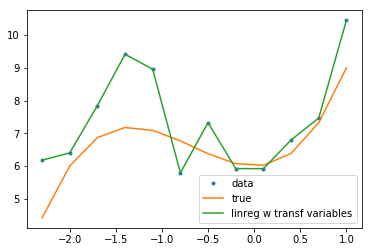

In [117]:
model = skl_lm.LinearRegression()
model.fit(x_train_ext, y_train)
prediction = model.predict(x_test_ext)

plt.plot(x_train, y_train, '.', label='data')
plt.plot(x_test, y_test, label='true')
plt.plot(x_test, prediction, label='linreg w transf variables')
plt.legend()
plt.show()

## (f) 

Use the fucntion `sklearn.linear_model.Ridge` and `sklearn.linear_model.Lasso` to fit a 11th degree polynomial. Also inspect the estimated coefficients. Try different values of penalty term $\alpha$. What do you observe?


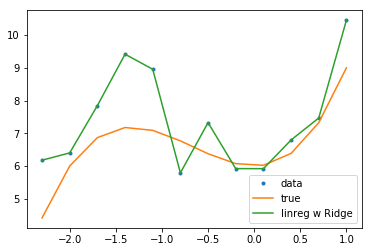

In [119]:
#Ridge
model = skl_lm.Ridge(alpha=1)
model.fit(x_train_ext, y_train)
predicton = model.predict(x_test_ext)

plt.plot(x_train, y_train,'.',label='data')
plt.plot(x_test, y_test, label='true')
plt.plot(x_test, prediction, label='linreg w Ridge')
plt.legend()
plt.show()